<a href="https://colab.research.google.com/github/michaelscheinfeild/PytorchLightCode/blob/main/MnistpytorchLighting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=OMDn66kM9Qc

In [ ]:
import torch
from torch import nn

In [ ]:
from torch import optim

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import random_split,DataLoader

In [ ]:
import pdb

In [ ]:
torch.rand(5).cuda()

tensor([0.8059, 0.1891, 0.7194, 0.1090, 0.0948], device='cuda:0')

In [ ]:
model=nn.Sequential(
    nn.Linear(28*28,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Dropout(0.1),#overfit
    nn.Linear(64,10)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.1, inplace=False)
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transforms.ToTensor())


In [ ]:
train,val= random_split(train_data,[55000,5000])
train_loader = DataLoader(train,batch_size=32)
val_loader = DataLoader(val,batch_size=32)

In [ ]:
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(28*28,64)
    self.l2=nn.Linear(64,64)
    self.l3=nn.Linear(64,10)
    self.do=nn.Dropout(0.1)

  def forward(self,x):
    h1=nn.functional.relu(self.l1(x))
    h2=nn.functional.relu(self.l2(h1))
    do=self.do(h1+h2)
    logits = self.l3(do)
    return logits


model=ResNet().cuda()
model

ResNet(
  (l1): Linear(in_features=784, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=64, bias=True)
  (l3): Linear(in_features=64, out_features=10, bias=True)
  (do): Dropout(p=0.1, inplace=False)
)

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=1e-2)

In [ ]:
loss=nn.CrossEntropyLoss()

In [ ]:
nb_epochs=5

for epoch in range(nb_epochs):
  losses=list()
  accuracies=list()
  model.train()# dropot active
  for batch in train_loader:
    x,y=batch

    #n*28*28
    b=x.size(0)
    x=x.view(b,-1).cuda()

    #forward
    l=model(x) #logit

    #pdb.set_trace()

    #objective
    J=loss(l,y.cuda())

    #clean gradient  /we can use optimizer as well
    model.zero_grad()

    #accumaluta partial derivate
    J.backward()

    #step opposite direction gradient
    optimizer.step()  #params=params-ata*params.grad

    losses.append(J.item())

    #pdb.set_trace()
    accuracies.append((y.to(l.device)==l.detach().argmax(dim=1)).float().mean().cpu())

  print(f'Epoch {epoch+1}, trainloss:  {torch.tensor(losses).mean():.2f} accuracy {torch.tensor(accuracies).mean():.2f}')

  losses=list()
  accuracies=list()
  model.eval()# no dropout
  for batch in val_loader:
    x,y=batch

    #n*28*28
    b=x.size(0)
    x=x.view(b,-1).cuda()

    #forward J just tensor no graph connected we not compute gradients
    with torch.no_grad():
      l=model(x) #logit

    #objective
    J=loss(l,y.cuda())

    losses.append(J.item())
    accuracies.append((y.to(l.device)==l.detach().argmax(dim=1)).float().mean().cpu())


  print(f'Epoch {epoch+1}, validationloss  {torch.tensor(losses).mean():.2f} accuracy {torch.tensor(accuracies).mean():.2f}')



Epoch 1, trainloss:  0.84 accuracy 0.78
Epoch 1, validationloss  0.38 accuracy 0.90
Epoch 2, trainloss:  0.38 accuracy 0.89
Epoch 2, validationloss  0.29 accuracy 0.92
Epoch 3, trainloss:  0.31 accuracy 0.91
Epoch 3, validationloss  0.25 accuracy 0.93
Epoch 4, trainloss:  0.27 accuracy 0.92
Epoch 4, validationloss  0.22 accuracy 0.94
Epoch 5, trainloss:  0.24 accuracy 0.93
Epoch 5, validationloss  0.20 accuracy 0.94


In [ ]:
accuracies[0].device

device(type='cuda', index=0)

In [ ]:
len(accuracies)


1719

In [ ]:
accuracies[0].__class__

torch.Tensor

In [ ]:
torch.tensor(accuracies[0]).float().mean()


<ipython-input-20-82182267fa02>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(accuracies[0]).float().mean()


tensor(0., device='cuda:0')

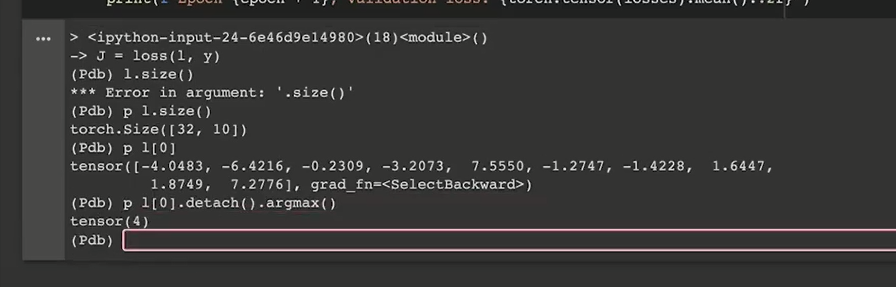

p (y[:4].to(l.device)==l.detach().argmax(dim=1)[:4])

 p (y.to(l.device)==l.detach().argmax(dim=1)).float().mean()

 p l.size()

p l[0].detach().softmax(dim=0)

p  [f'{p:.2f}' for p in l[0].detach().softmax(dim=0)]

p y.size()

p y[:4]

p l.detach().argmax(dim=1)[:6]

In [ ]:
import matplotlib.pyplot as plt

#pytorch light

https://www.youtube.com/watch?v=DbESHcCoWbM

In [ ]:
! pip install  pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 45.7 MB/s eta 0:00:00


In [ ]:
import pytorch_lightning as pl

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics.functional import accuracy

In [ ]:
 '''
  #deprected
  def validation_epoch_end(self,val_step_outputs):
    avg_val_loss = torch.tensor([x['loss'] for x in val_step_outputs]).mean()
    avg_val_acc = torch.tensor([x['progress_bar']['val_acc'] for x in val_step_outputs]).mean()

    pbar={'avg_val_acc':avg_val_acc}

    return {'val_loss':avg_val_loss,'progress_bar':pbar}

  '''

In [ ]:
from pytorch_lightning.callbacks.progress import progress_bar

In [ ]:

class ImageClassifier(pl.LightningModule):
  def __init__(self):

    super().__init__()
    self.l1=nn.Linear(28*28,64)
    self.l2=nn.Linear(64,64)
    self.l3=nn.Linear(64,10)
    self.do=nn.Dropout(0.1)
    self.loss =nn.CrossEntropyLoss()

  def forward(self,x):
    h1=nn.functional.relu(self.l1(x))
    h2=nn.functional.relu(self.l2(h1))
    do=self.do(h1+h2)
    logits = self.l3(do)
    return logits

  def configure_optimizers(self):
    optimizer = optim.SGD(self.parameters(),lr=1e-2)
    return optimizer

  def training_step(self,batch,batch_idx):

    x,y=batch

    #n*28*28
    b=x.size(0)
    x=x.view(b,-1)

    #forward
    logit= self(x) #model(x) #logit

    #pdb.set_trace()

    #objective
    J=self.loss(logit,y)

    acc = accuracy(logit,y,task='multiclass',num_classes=10)
    pbar={'train_acc':acc}
    return {'loss':J,'progress_bar':pbar}

    #def validation_step(self,batch,batch_idx):
    #results = self.training_step(batch,batch_idx)
    #results['progress_bar']['val_acc']=results['progress_bar']['trin_acc']
    #del results['progress_bar']['trin_acc']
    #return results


  def train_dataloader(self):
        train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
        #self.train, self.val = random_split(train_data, [55000, 5000])
        #train_loader = DataLoader(self.train, batch_size=32)
        train_loader = DataLoader(train_data, batch_size=32)
        return train_loader


  #def val_dataloader(self):

  #   val_loader = DataLoader(self.val,batch_size=32)
  #   return val_loader


In [ ]:
model = ImageClassifier()

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
from pytorch_lightning.callbacks.progress.progress_bar import ProgressBar

In [ ]:
from pytorch_lightning.callbacks import ProgressBar

In [ ]:
class CustomProgressBar1(ProgressBar):
    def init_train_tqdm(self):
        bar = super().init_train_tqdm()
        bar.set_postfix_str("lr: {:.4f}".format(self.trainer.optimizers[0].param_groups[0]['lr']))
        return bar

In [ ]:
class CustomProgressBar(ProgressBar):
    def init_train_tqdm(self):
        bar = tqdm.notebook.tqdm(total=self.total_train_batches, position=0)
        return bar

In [ ]:
custom_progress_bar = CustomProgressBar()

In [ ]:
import builtins
original_print = builtins.print

In [ ]:
def custom_print(*args, **kwargs):
    kwargs['flush'] = True
    original_print(*args, **kwargs)

In [ ]:
!pip install tqdm

In [ ]:
import tqdm

In [ ]:
builtins.print = custom_print

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=dd1bc37ef21927665cae54639fb387f4cdd49b49386336c0f648c18d5c2fec41
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
from pytorch_lightning.loggers import WandbLogger

In [ ]:
#wandb_logger = WandbLogger(project="p", entity="e", log_model=True,   log_graph=True)

In [ ]:
#trainer=pl.Trainer(callbacks=[custom_progress_bar],max_epochs=5)
trainer=pl.Trainer(max_epochs=5)#gpus=1 not working here ?
trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type             | Params
------------------------------------------
0 | l1   | Linear           | 50.2 K
1 | l2   | Linear           | 4.2 K 
2 | l3   | Linear           | 650   
3 | do   | Dropout          | 0     
4 | loss | CrossEntropyLoss | 0     
------------------------------------------
55.1 K    Trainable params
0         Non-trainable params
55.1 K    Total params
0.220     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
!ls lightning_logs/

version_0  version_2  version_4  version_6  version_8
version_1  version_3  version_5  version_7


In [ ]:
ls lightning_logs/version_5/

checkpoints/  events.out.tfevents.1692813924.2b200cc6b0a9.610.5  hparams.yaml


In [ ]:
ls lightning_logs/version_5/checkpoints/

'epoch=3-step=7500.ckpt'
